https://huggingface.co/docs/transformers/en/model_doc/grounding-dino#transformers.GroundingDinoForObjectDetection

In [1]:
import torch
from transformers import AutoProcessor, GroundingDinoForObjectDetection
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "a cat."

processor = AutoProcessor.from_pretrained("IDEA-Research/grounding-dino-tiny")
model = GroundingDinoForObjectDetection.from_pretrained("IDEA-Research/grounding-dino-tiny")

inputs = processor(images=image, text=text, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = processor.image_processor.post_process_object_detection(
    outputs, threshold=0.35, target_sizes=target_sizes
)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 1) for i in box.tolist()]
    print(f"Detected {label.item()} with confidence " f"{round(score.item(), 2)} at location {box}")

/home/eranario/miniconda3/envs/diffusers/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Detected 1 with confidence 0.45 at location [344.8, 23.2, 637.4, 373.8]
Detected 1 with confidence 0.41 at location [11.9, 51.6, 316.6, 472.9]


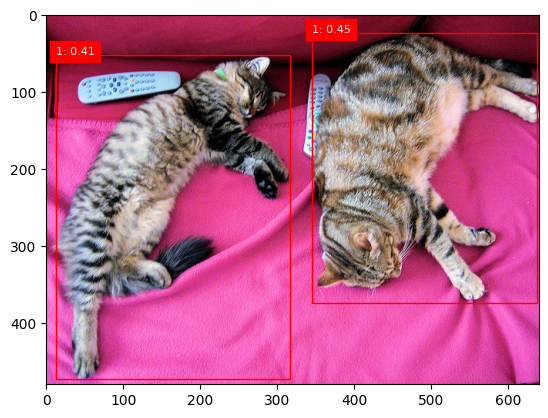

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Convert PIL image to numpy array for plotting
np_image = np.array(image)

# Create a matplotlib figure and axis for plotting
fig, ax = plt.subplots(1)
ax.imshow(np_image)

# Loop through the detections and draw each one
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 1) for i in box.tolist()]
    # Create a Rectangle patch
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
    # Add the rectangle to the plot
    ax.add_patch(rect)
    # Add label and score to the rectangle
    plt.text(box[0], box[1], f'{label.item()}: {round(score.item(), 2)}', color='white', fontsize=8, backgroundcolor='red')

# Display the figure
plt.show()